# Drawing Matplotlib Figure like DataGraph
Author: Younggyo Seo (younggyo.seo@kaist.ac.kr)

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager
%matplotlib inline

font = 'Arial'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = font
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = font
plt.rcParams['mathtext.it'] = font
plt.rcParams['mathtext.bf'] = font
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['ytick.minor.width'] = 0.5

linewidth = 2.5

In [2]:
from matplotlib import font_manager
for i in font_manager.fontManager.ttflist:
    if 'Nanum' in i.name:
        print(i.name, i.fname)

NanumGothic /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothic.ttf


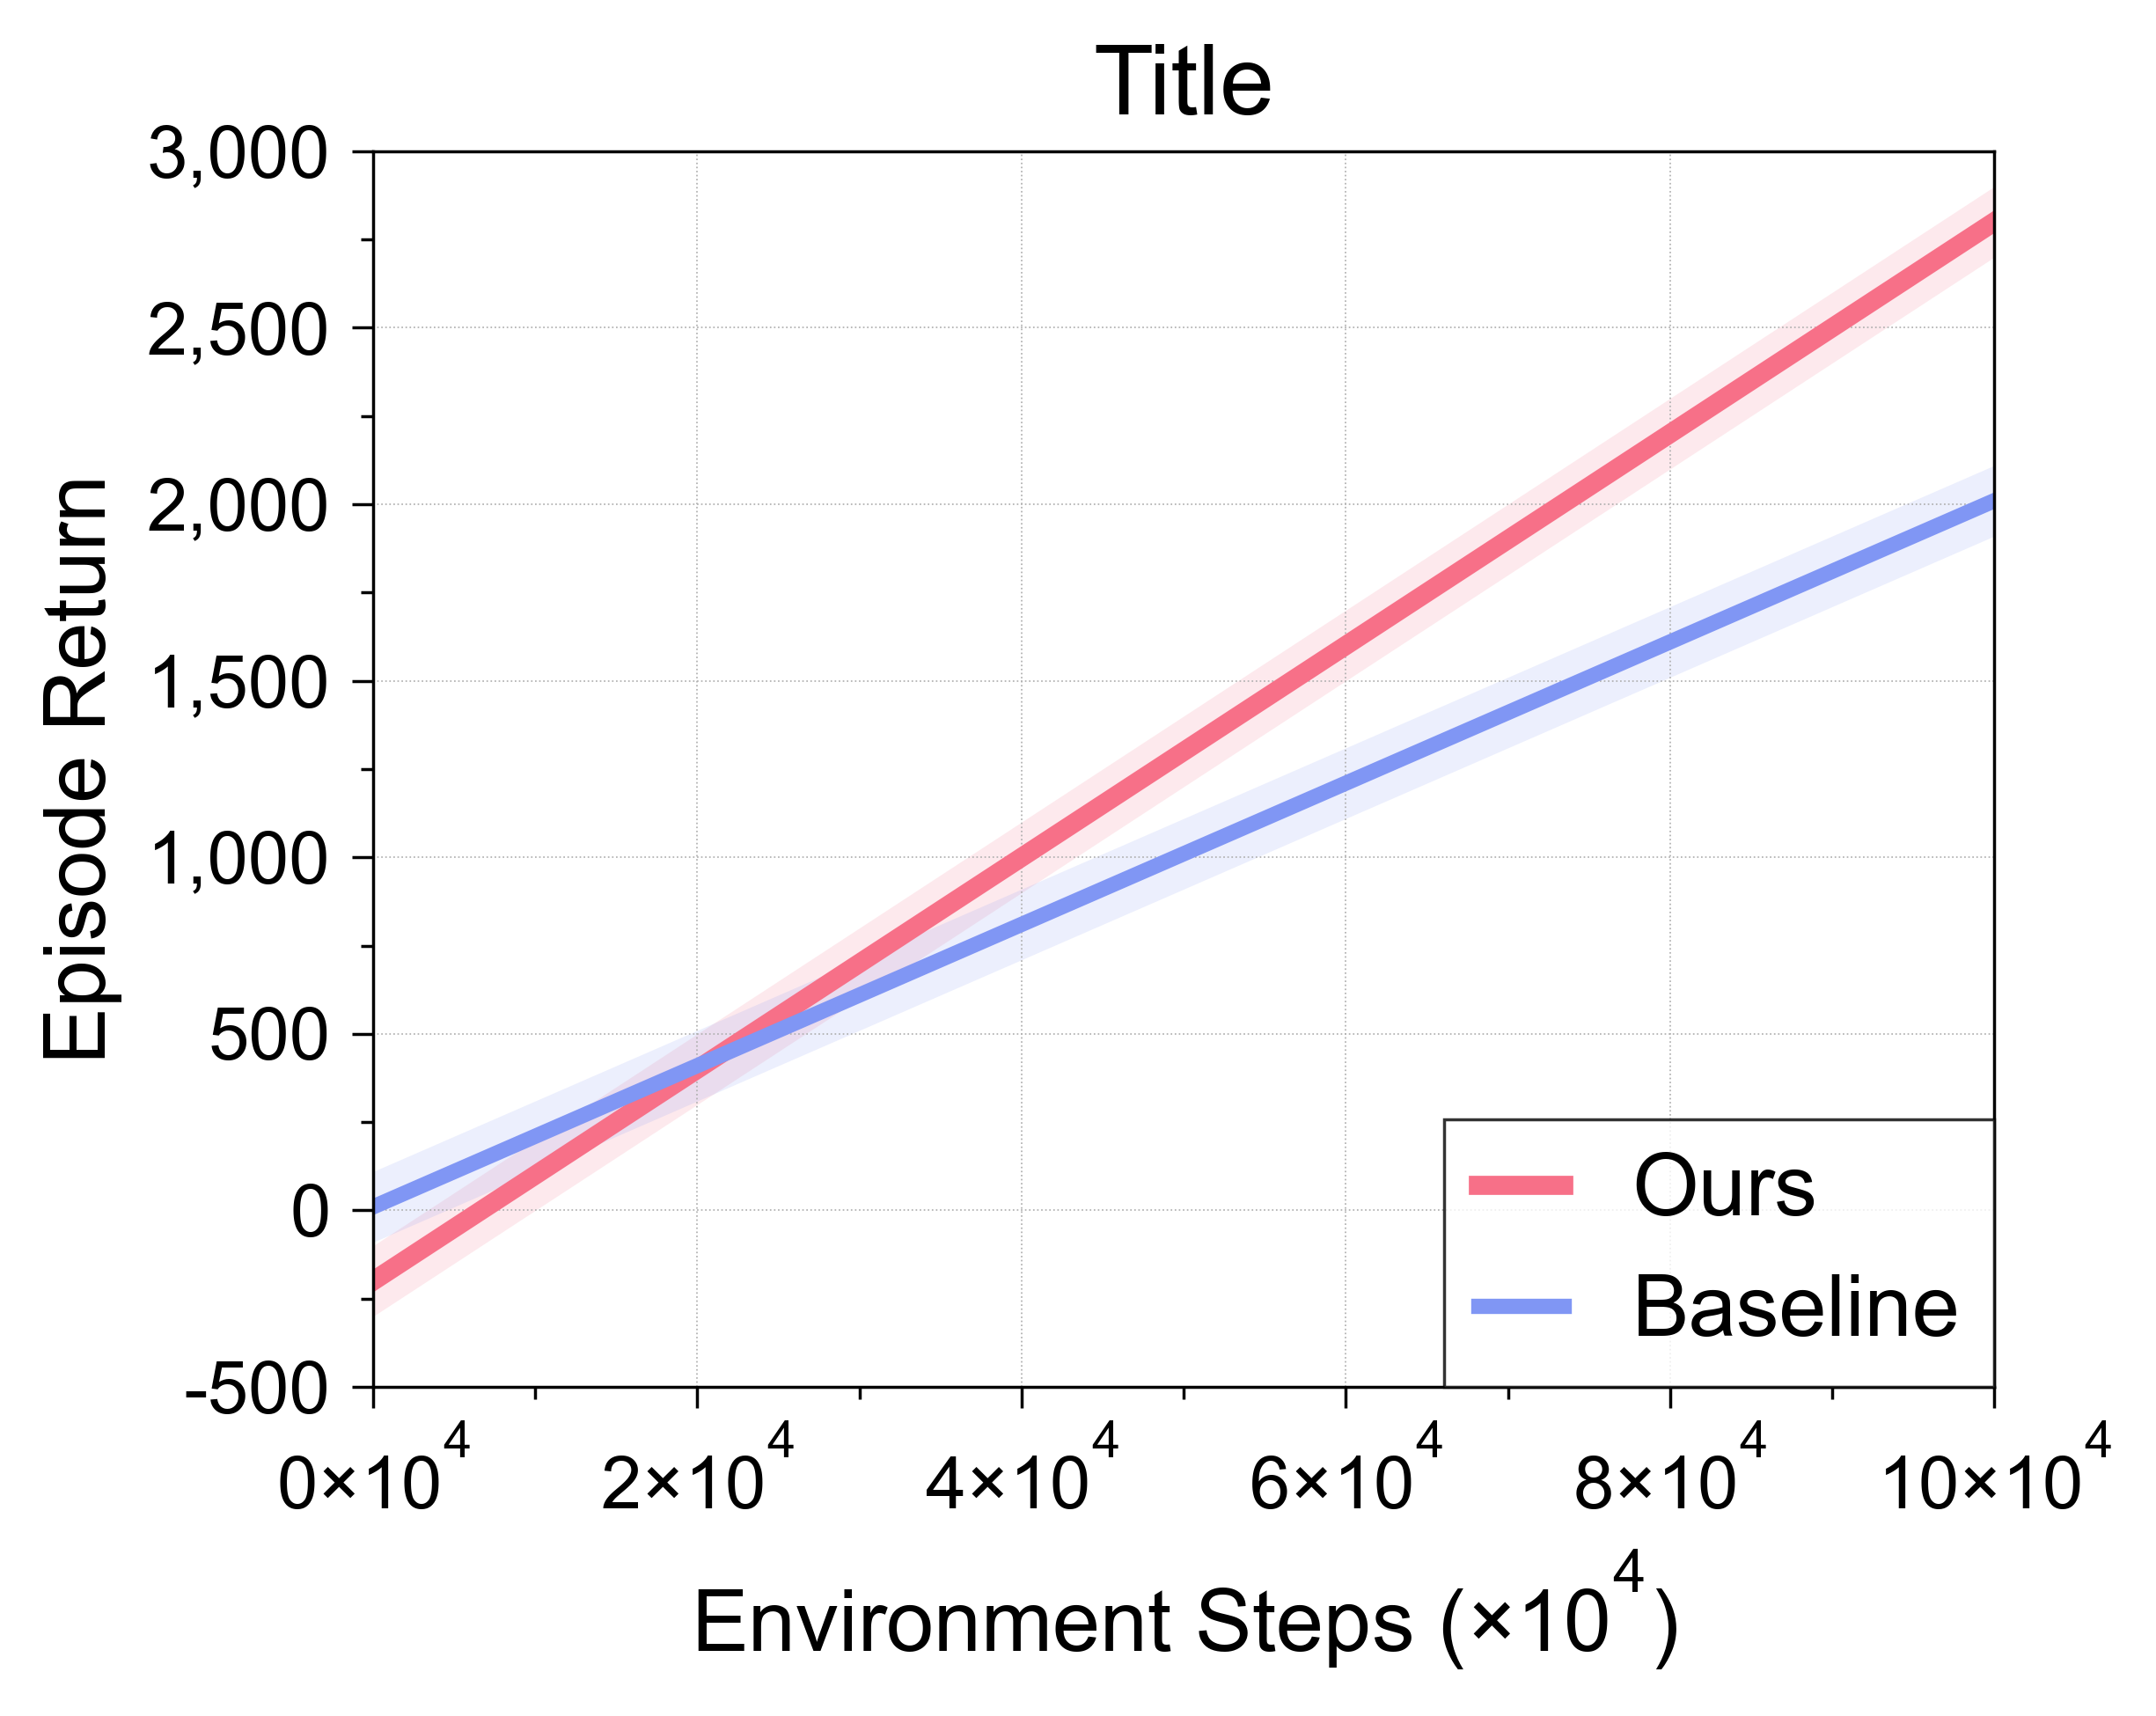

In [5]:
xx = np.arange(101)
yy1 = 30 * xx - 200
yy1_std = 100
yy2 = 20 * xx + 10
yy2_std = 100

fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi=500)

ax.plot(xx, yy1, color=(247/255, 112/255, 136/255), label='Ours', linewidth=linewidth * 1.25)
ax.fill_between(xx, yy1 - yy1_std, yy1 + yy1_std, facecolor=(247/255, 112/255, 136/255, 0.15), edgecolor=(0, 0, 0, 0))

ax.plot(xx, yy2, color=(128/255, 150/255, 244/255), label='Baseline', linewidth=linewidth * 1)
ax.fill_between(xx, yy2 - yy2_std, yy2 + yy2_std, facecolor=(128/255, 150/255, 244/255, 0.15), edgecolor=(0, 0, 0, 0))

ax.set_xlabel('Environment Steps ($\\times 10^4%$)', fontsize=14)
ax.set_ylabel('Episode Return', fontsize=14)
ax.set_title('Title', fontsize=16)

ax.grid(alpha=1.0, linestyle=':', linewidth=0.25)
ax.tick_params(axis='both', which='major', labelsize=12)

ax.set_yticks([-500, 0, 500, 1000, 1500, 2000, 2500, 3000])
ax.set_yticks([-250, 250, 750, 1250, 1750, 2250, 2750], minor=True)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
)

ax.set_xticks([0, 20, 40, 60, 80, 100])
ax.set_xticks([10, 30, 50, 70, 90], minor=True)
def set_xtick(x, p):
    return '{}$\\times 10^4$'.format(int(x / 10))
# NOTE: use xtick with 10^4 or xlabel with 10^4
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(set_xtick)
)
ax.xaxis.major.formatter._useMathText = True

ax.set_xlim(0, 100)
ax.set_ylim(-500, 3000)

leg = ax.legend(loc='lower right', fancybox=False, fontsize=14, edgecolor='black', borderaxespad=0.0, handlelength=1.0)
leg.get_frame().set_linewidth(0.5)

plt.tight_layout()

In [6]:
# Save
fig.savefig('figure_4a_1006.pdf')